<h1><center>201821002 이의민 기말고사 대체 과제</center></h1>

## 데이터 전처리

In [1]:
import pandas as pd
df = pd.read_csv('wine_review.csv')

In [2]:
df.head()

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs


In [3]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'dateAdded', 'dateUpdated',
       'descriptions', 'dimension', 'ean', 'flavors', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend',
       'reviews.id', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'sourceURLs', 'upc', 'weight'],
      dtype='object')

## 데이터 정리 (노이즈 제거, 결측값 처리 등) 

In [4]:
# 필요한 칼럼만을 남김
df = df[['brand', 'name', 'reviews.rating', 'reviews.text', 'reviews.title']].dropna()

In [5]:
df.head()

,brand,name,reviews.rating,reviews.text,reviews.title
0,Gallo,Ecco Domani174 Pinot Grigio - 750ml Bottle,5.0,This a fantastic white wine for any occasion!,My Favorite White Wine
1,Fresh Craft Co.,Fresh Craft174 Mango Citrus - 4pk / 250ml Bottle,5.0,"Tart, not sweet...very refreshing and delicious!",Yum!!
2,1000 Stories,1000 Stories174 Zinfandel - 750ml Bottle,5.0,I was given this wine so it was a delightful s...,A New Favorite!
3,1000 Stories,1000 Stories174 Zinfandel - 750ml Bottle,5.0,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious"
4,Wine Cube153,Pink Moscato - 3l Bottle - Wine Cube153,5.0,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!"


## 텍스트 토큰화 및 불용어 제거

In [6]:
%pip install nltk
import time
import pandas as pd
import nltk as nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer # nltk의 VADER 감정 분석기를 가져옮
nltk.download('vader_lexicon') # VADER 감정 분석기에 필요한 어휘 자료를 다운로드

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ouiminlee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
# 데이터프레임 내의 칼럼 접속을 위하여 이름을 변경
df.rename(columns={'reviews.title': 'reviews_title'}, inplace=True)
df.rename(columns={'reviews.text': 'reviews_text'}, inplace=True)
df.rename(columns={'reviews.rating': 'reviews_rating'}, inplace=True)

# Removing stop words
- 부정적 및 긍정적 리뷰 열에 대해 감성 분석 기능을 실행하는 경우 시간이 오래 걸릴 수 있음
- 문장의 감성을 바꾸지 않는 일반적인 영어 단어인 stop words를 제거할 수 있음
- 이러한 단어를 제거하면 감성어 분석이 더 빠르게 실행되지만 정확도가 떨어지지는 않음
    - 가장 긴 부정적 리뷰는 395단어였지만, 중지 단어를 제거한 후에는 195단어로 줄었습니다.

In [8]:
nltk.download('stopwords')

# Remove stop words - can be slow for a lot of text!
# Ryan Han (ryanxjhan on Kaggle) has a great post measuring performance of different stop words removal approaches
# https://www.kaggle.com/ryanxjhan/fast-stop-words-removal # using the approach that Ryan recommends
start = time.time()
cache = set(stopwords.words("english"))
def remove_stopwords(review):
    text = " ".join([word for word in review.split() if word not in cache])
    return text

# Remove the stop words from both columns
df.reviews_title = df.reviews_title.apply(remove_stopwords)   
df.reviews_text = df.reviews_text.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ouiminlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 텍스트 정규화 (스테밍 또는 표제어 추출)

In [9]:
#lemmatizer를 사용하여 스테밍과 표제어를 추출
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

#lemmatize를 활용하여 단어를 기본형으로 변형함
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalnum() and word not in cache]
    return ' '.join(tokens)

df['reviews_title'] = df['reviews_title'].apply(preprocess)
df['reviews_text'] = df['reviews_text'].apply(preprocess)


In [10]:
df.head(20)

,brand,name,reviews_rating,reviews_text,reviews_title
0,Gallo,Ecco Domani174 Pinot Grigio - 750ml Bottle,5.0,this fantastic white wine occasion,my favorite white wine
1,Fresh Craft Co.,Fresh Craft174 Mango Citrus - 4pk / 250ml Bottle,5.0,tart sweet refreshing delicious,yum
2,1000 Stories,1000 Stories174 Zinfandel - 750ml Bottle,5.0,i given wine delightful surprise find flavorfu...,a new favorite
3,1000 Stories,1000 Stories174 Zinfandel - 750ml Bottle,5.0,this phenomenal wine new favorite red,bold flavorful aromatic delicious
4,Wine Cube153,Pink Moscato - 3l Bottle - Wine Cube153,5.0,4 750ml bottle price two with way le packaging...,yum plus environmentally friendly
5,Beck's Na,Beck's174 Non Alcoholic Beer - 6pk / 12oz Bottles,5.0,i love beck na it taste like regular ale it sm...,great taste
6,Gallo,Apothic174 Red Blend - 750ml Bottle,3.0,this wine wonderful strong aroma bit bitter bi...,simply wonderful
7,Gallo,Apothic174 Red Blend - 750ml Bottle,2.0,i would give one star came clean bottle called...,a sweet red
9,Charles Charles,Charles Charles174 Red Blend - 750ml Bottle,5.0,this smooth red aroma cocoa coffee tobacco swe...,charles charles red blend
10,Fancy Pants,Fancy Pants174 Sauvignon Blanc - 750ml Bottle,5.0,based positive review i served fancy pant vari...,this wine made my party


## 모델 구현

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# nltk에서 vader 다운로드
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ouiminlee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## 모델 학습 및 튜닝

In [12]:
# 필요한 칼럼만 남겨둠
df = df[['reviews_text', 'reviews_rating']].dropna()

# 3점을 기준으로 긍정적인 평점과 부정적인 평점을 판별
df['Sentiment'] = df['reviews_rating'].apply(lambda x: 'positive' if x >= 3.0 else 'negative')

In [13]:
# VADER 감정분석기 초기화
sid = SentimentIntensityAnalyzer()

# 감성 점수 계산
df['VADER_Score'] = df['reviews_text'].apply(lambda review: sid.polarity_scores(review)['compound'])

# 감정 레이블 할당
df['VADER_Sentiment'] = df['VADER_Score'].apply(lambda score: 'positive' if score >= 0 else 'negative')


In [14]:
# 데이터셋 분할 
X_train, X_test, y_train, y_test = train_test_split(df['reviews_text'], df['Sentiment'], test_size=0.2, random_state=42)

# 레이블을 0과 1로 변환
y_train = y_train.apply(lambda x: 1 if x == 'positive' else 0)
y_test = y_test.apply(lambda x: 1 if x == 'positive' else 0)

# 파이프라인 설정 (TF-IDF 벡터화와 로지스틱 회귀 포함)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression(max_iter=1000))
])



## 튜닝 (예: 그리드 서치 또는 랜덤 서치 사용)

In [15]:
# 그리드 서치
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']
}

## 교차 검증과 같은 기술을 사용하여 견고성 보장)

In [16]:
# 교차 검증을 수행
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# 최적 파라미터
print(f'최적 파라미터: {grid_search.best_params_}')

최적 파라미터: {'logreg__C': 10, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}


## 모델 평가(정확도, 정밀도, 재현율, F1 점수 및 ROC-AUC와 같은 지표를 사용하여 모델 평가)

In [17]:
# 최적 모델 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.9680170575692963
Precision: 0.9698924731182795
Recall: 0.9977876106194691
F1 Score: 0.9836423118865867
ROC-AUC: 0.9407860489328475


## 오버피팅과 언더피팅을 논의하고 이를 해결하는 방법 학습

In [18]:
# 오버피팅과 언더피팅 논의
train_predictions = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f'훈련 정확도: {train_accuracy}')

if train_accuracy > accuracy + 0.1:
    print("오버피팅")
elif train_accuracy < accuracy - 0.1:
    print("언더피팅")
else:
    print("모델이 적절히 학습되었습니다.")


훈련 정확도: 0.9989316239316239
모델이 적절히 학습되었습니다.


## 시각화 및 보고(Matplotlib 또는 Seaborn과 같은 라이브러리를 사용하여 결과 시각화)

### 혼동 행렬 및 ROC 곡선 생성

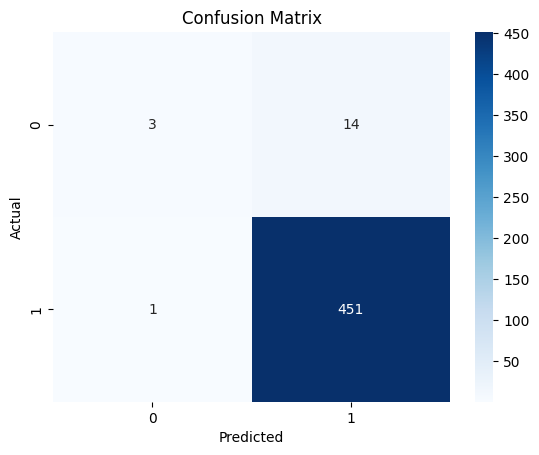

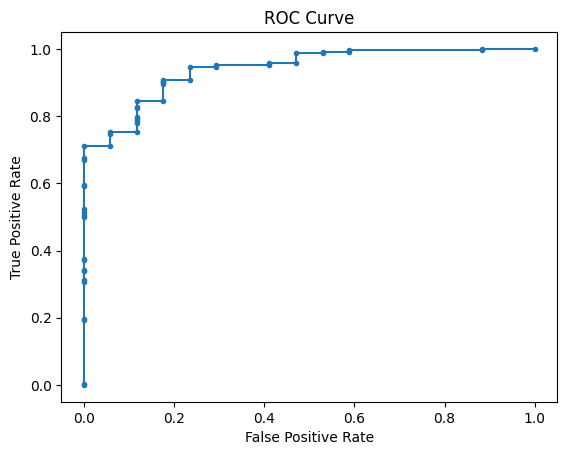

In [19]:
# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC 곡선 시각화
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
